In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from keras.utils import np_utils


Using TensorFlow backend.


In [ ]:
def normalization(X, image_dim_ordering):

    X = X / 255.
    if image_dim_ordering == "tf":
        X = (X - 0.5) / 0.5
    else:
        X = (X - 0.5) / 0.5
    return X

In [ ]:
def load_usps(image_dim_ordering):
    #Loading mnist labels, they should be the same of mnistM
    X_train=np.load("./usps_X_train28.npy")
    y_train=np.load("./usps_y_train.npy")
    X_test=np.load("./usps_X_test28.npy")
    y_test=np.load("./usps_y_test.npy")
    
#     path = './data/USPS/usps.h5'
#     with h5py.File(path, 'r') as hf:
#         train = hf.get('train')
#         X_train = train.get('data')[:]
#         y_train = train.get('target')[:]
#         test = hf.get('test')
#         X_test = test.get('data')[:]
#         y_test = test.get('target')[:]
    
#     X_train = X_train.reshape(X_train.shape[0],16,16)
#     X_test = X_test.reshape(X_test.shape[0],16,16)
    
#     train = []
#     for img in X_train:
#         resized_img = cv2.resize(img, (28, 28))
#         train.append(resized_img)
#     X_train = np.asarray(train)
    
#     del train[:]
#     for img in X_test:
#         resized_img = cv2.resize(img, (28, 28))
#         train.append(resized_img)
#     X_test = np.asarray(train)
    
    if image_dim_ordering == 'th':
        X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
        X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
        
    else:
        X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
        X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
   
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train = normalization(X_train, image_dim_ordering)
    X_test = normalization(X_test, image_dim_ordering)

    nb_classes = len(np.unique(np.hstack((y_train, y_test))))

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    return X_train, Y_train, X_test, Y_test, nb_classes


In [ ]:
X_train,_,_,_,_  = load_usps('tf')

In [ ]:
X_train.shape

In [ ]:
X = X_train[1]/255.
plt.imshow(X[:,:,0],cmap = 'gray')

In [ ]:
X = ((X * 0.5 + 0.5) * 255.).astype(np.uint8)

In [ ]:
X_train = X_train.astype('float32')

In [ ]:
plt.imshow(X[:,:,0],cmap = 'gray')

In [9]:
num_labels = 10

In [7]:
def reformat(labels):
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return labels


In [2]:
path_to_data = "./USPSdata/Numerals/"

In [3]:
def resize_and_scale(img, size, scale):
    img = cv2.resize(img, size)
    return 1 - np.array(img, "float32")/scale

In [4]:
img_list = os.listdir(path_to_data)
sz = (28,28)
validation_usps = []
validation_usps_label = []
for i in range(10):
    label_data = path_to_data + str(i) + '/'
    img_list = os.listdir(label_data)
    for name in img_list:
        if '.png' in name:
            img = cv2.imread(label_data+name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_img = resize_and_scale(img, sz, 255)
            validation_usps.append(resized_img.flatten())
            validation_usps_label.append(i)

In [10]:
validation_usps = np.array(validation_usps)
print(validation_usps.shape)
validation_usps_label= np.array(validation_usps_label)
print (reformat(validation_usps_label).shape)

(19999, 784)
(19999, 10)


In [31]:
X_train = validation_usps[:15000]
Y_train = validation_usps_label[:15000]
X_test = validation_usps[15001:19999]
Y_test = validation_usps_label[15001:19999]

In [23]:
X_train = X_train.reshape(15000,28,28,1)
X_test = X_test.reshape(4998,28,28,1)

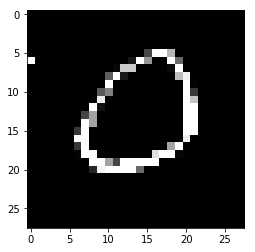

In [18]:
X = X_train[1].reshape(28,28,1)
plt.imshow(X[:,:,0], cmap = 'gray')

In [24]:
np.save('usps_new_tr',X_train)
np.save('usps_new_te',X_test)

In [32]:
np.save('usps_trl',Y_train)
np.save('usps_tel',Y_test)

In [26]:
X_train.shape

(15000, 28, 28, 1)

In [33]:
Y_test.shape

(4998,)

In [34]:
Y_test[0]

7